In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, getcwd, chdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import operator
import xgboost as xgb
from xgboost.training import CVPack
from xgboost import callback
from xgboost.core import CallbackEnv
from xgboost.core import EarlyStopException
from xgboost.core import STRING_TYPES

import diff_predictor
from diff_predictor import data_process
from diff_predictor.predxgboost import train

import json


In [19]:
with open("outputs/run_data.json", encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

JSONDecodeError: Expecting value: line 1 column 4855 (char 4854)

In [18]:
json_file_path = "outputs/run_data.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

JSONDecodeError: Expecting value: line 1 column 4855 (char 4854)

AttributeError: '_io.TextIOWrapper' object has no attribute 'len'

In [21]:
accs = {"Accuracies": [[0.4603174603174603, 0.5409836065573771, 0.5862068965517241, 0.5106382978723404, 0.4393939393939394, 0.423728813559322, 0.4576271186440678, 0.6363636363636364, 0.4666666666666667, 0.5087719298245614, 0.39622641509433965, 0.5967741935483871, 0.39655172413793105, 0.5, 0.5245901639344263, 0.5, 0.6363636363636364, 0.4642857142857143, 0.35, 0.46296296296296297, 0.4375, 0.4406779661016949, 0.5161290322580645, 0.5714285714285714, 0.3090909090909091], [0.47619047619047616, 0.5284552845528455, 0.5714285714285714, 0.5175438596491229, 0.45544554455445546, 0.5225225225225225, 0.5321100917431193, 0.49572649572649574, 0.5737704918032787, 0.4358974358974359, 0.45901639344262296, 0.5130434782608696, 0.5811965811965812, 0.5384615384615384, 0.6190476190476191, 0.44036697247706424, 0.43333333333333335, 0.5739130434782609, 0.48214285714285715, 0.475, 0.475, 0.5789473684210527, 0.5217391304347826, 0.5045871559633027, 0.5350877192982456], [0.40384615384615385, 0.49707602339181284, 0.40588235294117647, 0.5060975609756098, 0.6285714285714286, 0.49032258064516127, 0.5071428571428571, 0.5590062111801242, 0.4166666666666667, 0.5178571428571429, 0.5227272727272727, 0.5, 0.5425531914893617, 0.5402298850574713, 0.45751633986928103, 0.4875, 0.5846994535519126, 0.4125, 0.4794520547945205, 0.4720496894409938, 0.5341614906832298, 0.4936708860759494, 0.47126436781609193, 0.6530612244897959, 0.525974025974026], [0.5047169811320755, 0.5504587155963303, 0.6274509803921569, 0.5070422535211268, 0.4541284403669725, 0.4896265560165975, 0.5666666666666667, 0.4805194805194805, 0.5477386934673367, 0.5789473684210527, 0.49065420560747663, 0.4948453608247423, 0.5181818181818182, 0.5845410628019324, 0.6047619047619047, 0.46017699115044247, 0.48034934497816595, 0.5072463768115942, 0.49344978165938863, 0.4396135265700483, 0.5462555066079295, 0.5286343612334802, 0.3905579399141631, 0.45161290322580644, 0.4765625], [0.434640522875817, 0.46715328467153283, 0.4894894894894895, 0.4797047970479705, 0.5859649122807018, 0.5314685314685315, 0.6023622047244095, 0.47017543859649125, 0.5915492957746479, 0.5087719298245614, 0.5018315018315018, 0.48616600790513836, 0.4962686567164179, 0.4495798319327731, 0.6254295532646048, 0.5077519379844961, 0.516, 0.5631768953068592, 0.5278810408921933, 0.4724137931034483, 0.5208333333333334, 0.5625, 0.45484949832775917, 0.5493421052631579, 0.5037593984962406], [0.46273291925465837, 0.5737704918032787, 0.4818181818181818, 0.4268292682926829, 0.48169014084507045, 0.5386740331491713, 0.5469798657718121, 0.5, 0.4406779661016949, 0.5448717948717948, 0.5356037151702786, 0.5660377358490566, 0.4682080924855491, 0.4495114006514658, 0.43977591036414565, 0.486646884272997, 0.5706806282722513, 0.5205882352941177, 0.545751633986928, 0.521875, 0.4662756598240469, 0.4885057471264368, 0.5340909090909091, 0.48484848484848486, 0.514792899408284], [0.4824120603015075, 0.5, 0.46649484536082475, 0.4, 0.504950495049505, 0.46766169154228854, 0.4572192513368984, 0.5586734693877551, 0.5059101654846335, 0.5537190082644629, 0.5498721227621484, 0.5463659147869674, 0.5394736842105263, 0.5255102040816326, 0.4728682170542636, 0.49865951742627346, 0.5243243243243243, 0.4345679012345679, 0.5182724252491694, 0.5191815856777494, 0.5279805352798054, 0.5919395465994962, 0.5437665782493368, 0.5571030640668524, 0.48905109489051096], [0.5463320463320464, 0.421978021978022, 0.5756880733944955, 0.5221238938053098, 0.49877750611246946, 0.4943310657596372, 0.5264270613107822, 0.47794117647058826, 0.5639913232104121, 0.549266247379455, 0.5011547344110855, 0.4681818181818182, 0.58, 0.4948717948717949, 0.5468409586056645, 0.39737991266375544, 0.5520581113801453, 0.4753747323340471, 0.5637254901960784, 0.5382882882882883, 0.4742489270386266, 0.4978902953586498, 0.49514563106796117, 0.5095238095238095, 0.5112781954887218], [0.4500978473581213, 0.5327510917030568, 0.4989247311827957, 0.42971887550200805, 0.49536178107606677, 0.5389344262295082, 0.4841897233201581, 0.3576017130620985, 0.5641025641025641, 0.48502994011976047, 0.5398230088495575, 0.5262054507337526, 0.5047619047619047, 0.5377969762419006, 0.5213483146067416, 0.5316698656429942, 0.5029585798816568, 0.591792656587473, 0.4963768115942029, 0.541095890410959, 0.5467775467775468, 0.5178907721280602, 0.482421875, 0.4328018223234624, 0.5567010309278351], [0.5919055649241147, 0.5746691871455577, 0.500875656742557, 0.5121951219512195, 0.5355805243445693, 0.5449330783938815, 0.4649910233393178, 0.5506692160611855, 0.5256410256410257, 0.4188191881918819, 0.5106837606837606, 0.5310834813499112, 0.49166666666666664, 0.5008431703204047, 0.5185185185185185, 0.5195530726256983, 0.5134649910233393, 0.5245901639344263, 0.482078853046595, 0.5145454545454545, 0.46946564885496184, 0.47609942638623326, 0.5442307692307692, 0.41872791519434627, 0.5317324185248714]]}

0.4853311861983093 +/- 0.08022600497560467
0.5135989586010582 +/- 0.04993610500802248
0.5043931544075216 +/- 0.06104522978150765
0.5109895888171475 +/- 0.05422110562059153
0.5159625584444831 +/- 0.04934200698658104
0.5036495039421319 +/- 0.04271682289854225
0.50943910810486 +/- 0.04296924708257319
0.5113127646065466 +/- 0.04423159058305169
0.5066854080049674 +/- 0.048847123581113414
0.5107025559056507 +/- 0.039950084986216064


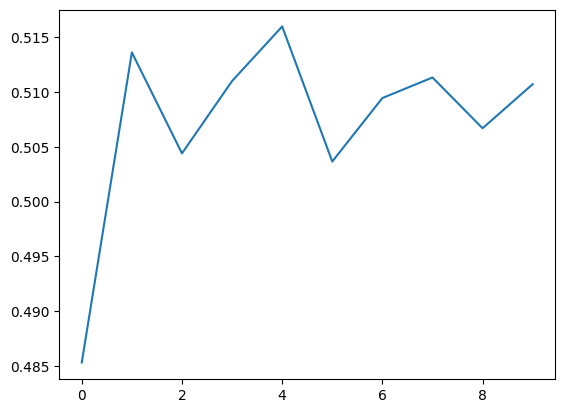

In [34]:
acc_list = []

for i in range(10):
    mean_acc = np.mean(accs['Accuracies'][i])
    acc_list.append(mean_acc)
    std_acc = np.std(accs['Accuracies'][i])

    print(f'{mean_acc} +/- {std_acc}')

plt.plot(acc_list)
    

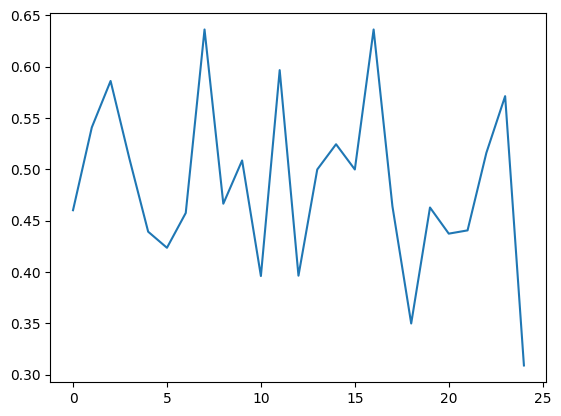